In [8]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import os
from time import time

import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn import svm
from sklearn.metrics import accuracy_score

In [22]:
def show_accuracy(a, b, tip):
    acc = a.ravel() == b.ravel()
    print tip + '正确率：%.2f%%' % (100 * np.mean(acc))


def save_image(im, i):
    im *= 15.9375
    im = 255 - im
    a = im.astype(np.uint8)
    output_path = './HandWritten'
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    Image.fromarray(a).save(output_path + ('/%d.png' % i))

In [27]:
print 'Load Training File Start...'
data = np.loadtxt('../dataset/optdigits.tra', dtype=np.float, delimiter=',')
x, y = np.split(data, (-1,), axis=1)
images = x.reshape(-1, 8, 8)
y = y.ravel().astype(np.int)

print 'Load Test Data Start...'
data = np.loadtxt('../dataset/optdigits.tes', dtype=np.float, delimiter=',')
x_test, y_test = np.split(data, (-1,), axis=1)
print y_test.shape
images_test = x_test.reshape(-1, 8, 8)
y_test = y_test.ravel().astype(np.int)
print 'Load Data OK...'

Load Training File Start...
Load Test Data Start...
(1797, 1)
Load Data OK...


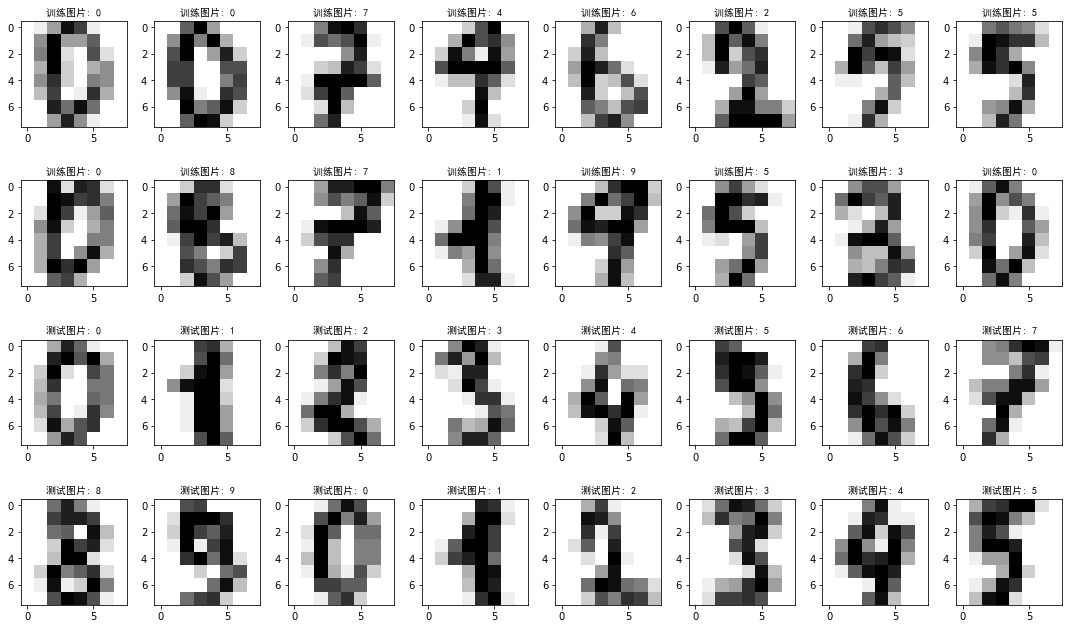

In [24]:
# x, x_test, y, y_test = train_test_split(x, y, test_size=0.4, random_state=1)
# images = x.reshape(-1, 8, 8)
# images_test = x_test.reshape(-1, 8, 8)

myfont = mpl.font_manager.FontProperties(fname='../fonts/simhei.ttf') #自定义字体
# mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False # 保存图片时'-' 可能为块
plt.figure(figsize=(15, 9), facecolor='w')
for index, image in enumerate(images[:16]):
    plt.subplot(4, 8, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(u'训练图片: %i' % y[index], fontproperties=myfont)
for index, image in enumerate(images_test[:16]):
    plt.subplot(4, 8, index + 17)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    save_image(image.copy(), index)
    plt.title(u'测试图片: %i' % y_test[index], fontproperties=myfont)
plt.tight_layout()
plt.show()

Start Learning...
训练+CV耗时：0分钟0.415秒
Learning is OK...
训练集准确率： 1.0
测试集准确率： 0.982749026155
[0 1 2 ..., 8 9 8]
[0 1 2 ..., 8 9 8]
[9 1 1 1 1 9 5 9 9 9 9 9 9 8 1 0 1 3 8 9 9 3 5 9 1 7 3 5 8 5 1]
[5 2 2 2 8 7 7 5 7 7 7 7 7 1 8 6 8 9 9 3 8 8 8 7 8 3 9 9 3 3 8]


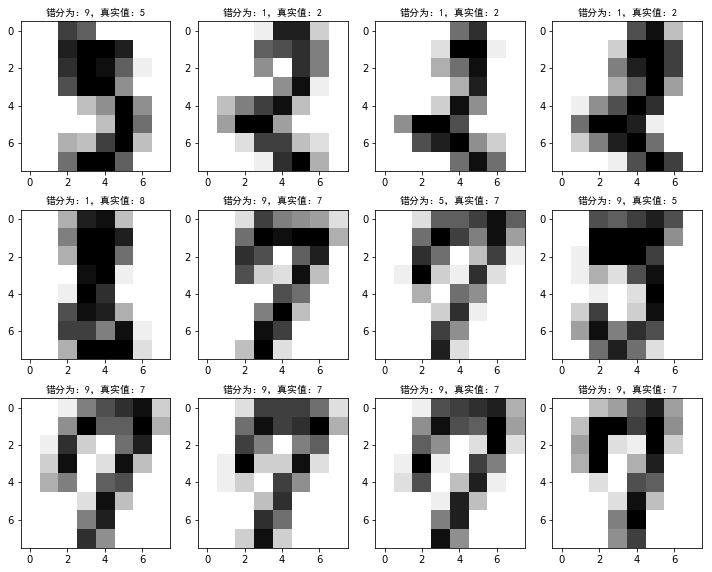

In [26]:
# params = {'C':np.logspace(0, 3, 7), 'gamma':np.logspace(-5, 0, 11)}
# model = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=params, cv=3)
model = svm.SVC(C=10, kernel='rbf', gamma=0.001)
print 'Start Learning...'
t0 = time()
# print '最优参数：\t', model.best_params_
# clf.fit(x, y)
model.fit(x, y)
t1 = time()
t = t1 - t0
print '训练+CV耗时：%d分钟%.3f秒' % (int(t / 60), t - 60 * int(t / 60))
print 'Learning is OK...'
print '训练集准确率：', accuracy_score(y, model.predict(x))
y_hat = model.predict(x_test)
print '测试集准确率：', accuracy_score(y_test, model.predict(x_test))
print y_hat
print y_test

err_images = images_test[y_test != y_hat]
err_y_hat = y_hat[y_test != y_hat]
err_y = y_test[y_test != y_hat]
print err_y_hat
print err_y
plt.figure(figsize=(10, 8), facecolor='w')
for index, image in enumerate(err_images):
    if index >= 12:
        break
    plt.subplot(3, 4, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(u'错分为：%i，真实值：%i' % (err_y_hat[index], err_y[index]), fontproperties=myfont)
plt.tight_layout()
plt.show()